# TED Talks Exploratory Data Analysis

## Import data and libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
from ast import literal_eval
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#read in summarized ted talk data
df = pd.read_csv('data/ted_main.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


Initial thoughts on what I can analyze
- is there a correlation between the number of languages and the number of views/comments/ratings?
- how correlated are views, comments and ratings? for example, are more viewed talks more commented on or more highly rated on average?
- how many events are in my dataset?
- how evenly distributed are my tags? is there a connection between the tags assigned and how popular a talk is?
- what information can I glean from the "ratings" column? it looks like there are some sentiments embedded in there

In [4]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [5]:
df.isnull().any()

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

## Clean and transform columns

Turn UNIX dates into datetime values

In [7]:
df['film_datestamp'] = df['film_date'].apply(datetime.fromtimestamp)
df['published_datestamp'] = df['published_date'].apply(datetime.fromtimestamp)
df[['film_datestamp','published_datestamp']]

,film_datestamp,published_datestamp
0,2006-02-24 18:00:00,2006-06-26 19:11:00
1,2006-02-24 18:00:00,2006-06-26 19:11:00
2,2006-02-23 18:00:00,2006-06-26 19:11:00
3,2006-02-25 18:00:00,2006-06-26 19:11:00
4,2006-02-21 18:00:00,2006-06-27 15:38:00
...,...,...
2545,2017-06-05 19:00:00,2017-09-19 15:00:16
2546,2017-04-23 19:00:00,2017-09-20 10:02:17
2547,2017-04-23 19:00:00,2017-09-21 10:01:35
2548,2017-07-07 19:00:00,2017-09-21 15:00:42


Process embedded data types

In [8]:
df['tags'] = df['tags'].apply(literal_eval)

In [9]:
df['rating_new'] = df['ratings'].apply(literal_eval)
df['rating_new']

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: rating_new, Length: 2550, dtype: object

In [10]:
rating_df = pd.DataFrame(df['rating_new'][0])
rating_df.head()

,id,name,count
0,7,Funny,19645
1,1,Beautiful,4573
2,9,Ingenious,6073
3,3,Courageous,3253
4,11,Longwinded,387


## Explore correlations between features

In [11]:
df.corr()

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


<AxesSubplot:>

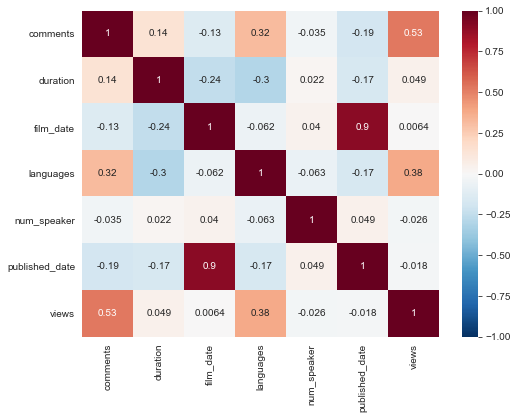

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(data = df.corr(), annot = True, cmap = 'RdBu_r', vmin = -1, vmax = 1)

Correlation notes:

- Comments:
    - Minor positive correlation with **duration** (the longer a talk, the more likely it is to be commented on)
    - Minor negative correlation with **film date** (older talks have more comments, possibly because they've been available for commenting longer?)
    - Medium correlation with **languages** (talks with more comments are available in more languages)
    - Slight negative correlation with **published date** (see comments on correlation with film date)
    - Reasonably strong correlation with **views** (talks with more comments have been viewed more times)  
   
   
- Duration
    - Slight negative correlation with **film date** (talks have gotten shorter over time)
    - Slight negative correlation with **languages** (longer talks are available in fewer languages)
    - Minor negative correlation with **published date** (talks published more recently are a little shorter)  
   
   
- Film Date
    - Strong positive correlation with **published date** (talks are published around the same time they are filmed)   
   
   
- Languages:
    - Minor negative correlation with **published date** (talks published more recently are available in fewer languages, possibly because there's been less time to translate them)
    - Medium correlation with **views** (talks available in more languages have more views)   
   
   
- Num Speaker - no meaningful correlations
    - At least 75% of the records in the dataset have a num speaker = 1, so there's very little variability in this feature

## View feature distributions

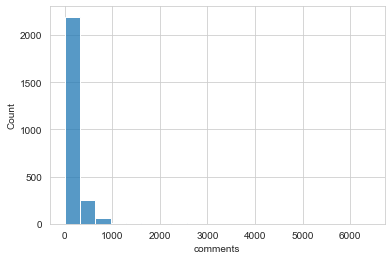

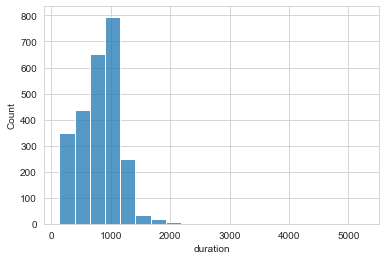

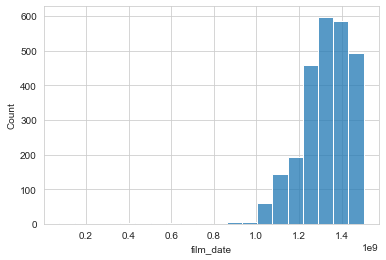

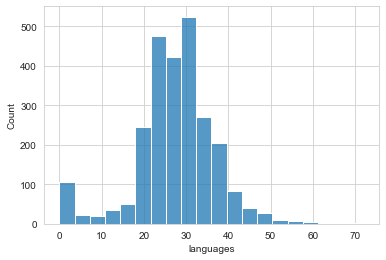

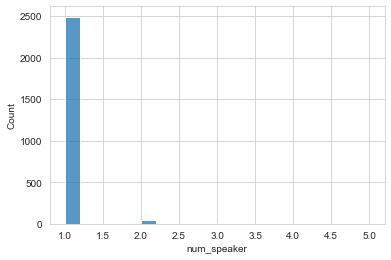

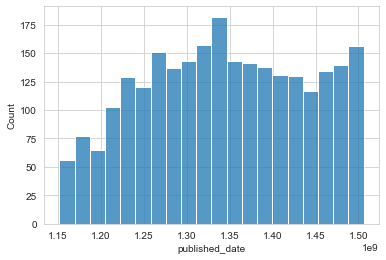

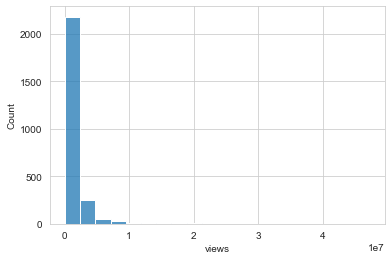

In [13]:
def plot_hist(features, df):
    
    for feature in features:
        sns.histplot(data = df[feature], bins = 20)
        plt.show()

feature_list = ['comments','duration','film_date','languages','num_speaker','published_date','views']

plot_hist(feature_list, df)

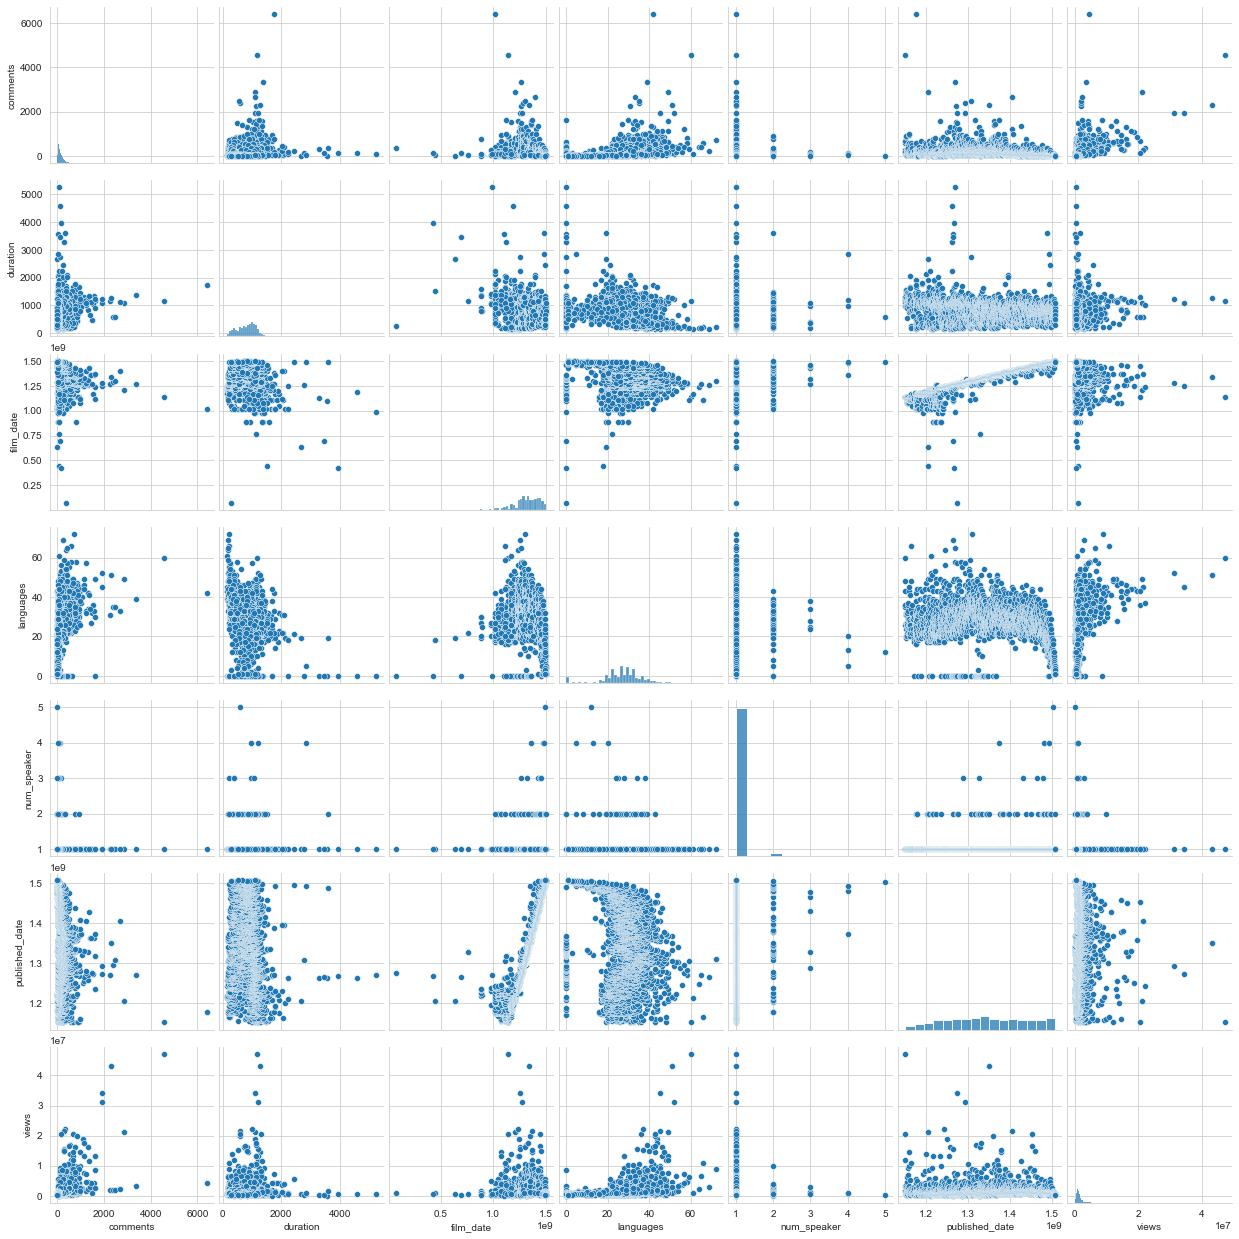

In [14]:
sns.pairplot(df)

## Explore data

TED Talks by Year

<AxesSubplot:>

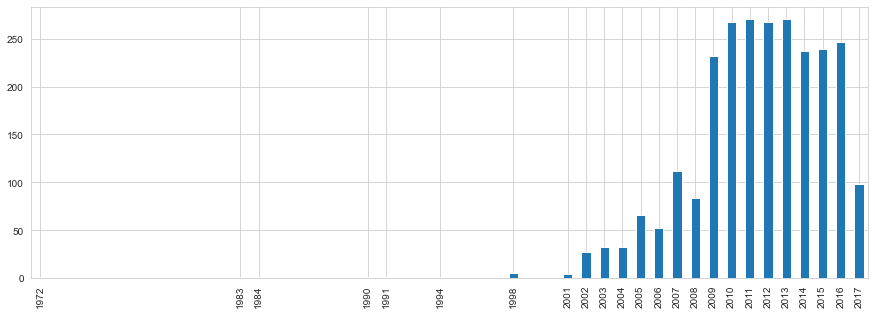

In [15]:
df['film_datestamp'].dt.year.value_counts().sort_index()
df['film_datestamp'].dt.year.value_counts().plot(kind = 'bar', figsize = (15,5))

Although the earliest talks in the dataset date back to 1972, they weren't recorded on a regular basis until around 2002.
There's a big jump in 2009, more than doubling the typical number of talks per year.
It looks like 2017 may not include the complete year.

## Tag analysis

Explode out the tags list so there is one row per tag per talk

In [16]:
#Create a series with one row per tag
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'tags'
s

0             children
0           creativity
0              culture
0                dance
0            education
             ...      
2549              play
2549     public spaces
2549           society
2549          software
2549    urban planning
Name: tags, Length: 19154, dtype: object

In [17]:
#Join the new series back to the original data
tags_df = df.drop('tags', axis = 1).join(s)

#For ease of analysis, add a year column
tags_df['film_year'] = tags_df['film_datestamp'].dt.year

tags_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,film_datestamp,published_datestamp,rating_new,tags,film_year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",children,2006
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",creativity,2006
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",culture,2006
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",dance,2006
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",education,2006


Identify the 10 most commonly occurring tags

In [18]:
# Top 10 talk tags (topics), not counting TEDx, which I will remove next
tags_df['tags'].value_counts()[0:11]

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
society          224
Name: tags, dtype: int64

In [20]:
#store the top 10 topics (ignoring TEDx) in a list for charting
tag_list = list(tags_df['tags'].value_counts()[0:11].index)
tag_list.remove('TEDx')

<AxesSubplot:>

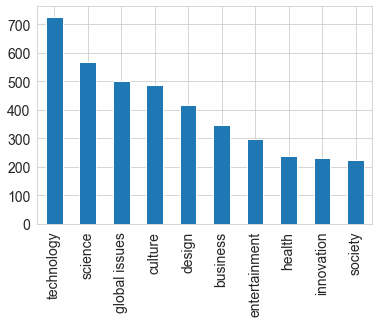

In [21]:
tags_df[tags_df['tags'].isin(tag_list)]['tags'].value_counts().plot(kind = 'bar', fontsize = 14)

In [22]:
#Sample of talks with top tags
tags_df[tags_df['tags'].isin(tag_list)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,film_datestamp,published_datestamp,rating_new,tags,film_year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",culture,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",culture,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",global issues,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",science,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-24 18:00:00,2006-06-26 19:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",technology,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2017-04-23 19:00:00,2017-09-20 10:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",science,2017
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,2017-04-23 19:00:00,2017-09-21 10:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",innovation,2017
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,2017-04-23 19:00:00,2017-09-21 10:01:35,"[{'i

Top tags count by year

In [23]:
top_tags = tags_df[tags_df['tags'].isin(tag_list)]
pd.crosstab(top_tags['film_year'], top_tags['tags'])

tags,business,culture,design,entertainment,global issues,health,innovation,science,society,technology
film_year,,,,,,,,,,
1983,0,0,0,0,0,0,0,1,0,0
1984,0,0,1,1,0,0,0,0,0,1
1990,0,0,1,0,1,0,0,0,0,1
1991,0,0,0,0,0,0,0,1,0,0
1994,0,0,0,0,0,0,1,1,0,1
1998,0,2,4,1,0,0,0,1,0,5
2001,0,2,1,1,0,0,0,1,1,1
2002,5,9,10,6,4,0,1,9,0,11
2003,5,8,10,7,7,2,1,11,2,13


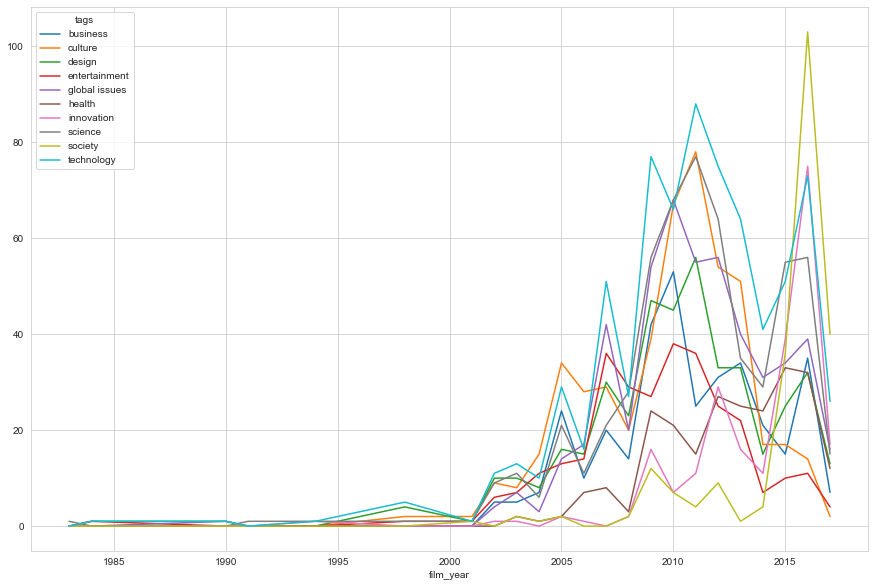

In [24]:
pd.crosstab(top_tags['film_year'], top_tags['tags']).plot(kind = 'line', stacked = False, figsize = (15,10))
plt.show()

TED Talks with the top tags really started to take off around 2001-2002, which is the same time talks started regularly being given.

Top tags by proportion of talks

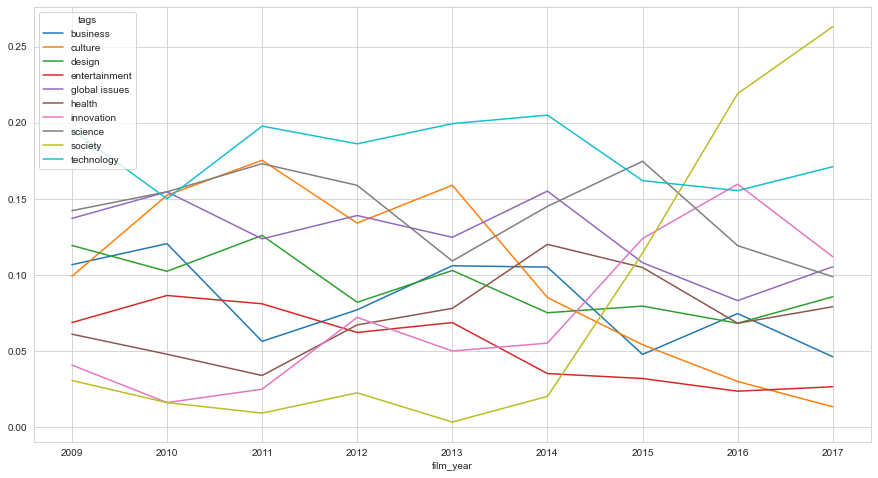

In [25]:
top_tags2001 = top_tags[top_tags['film_year'] > 2008]
top_tags_pct = pd.crosstab(top_tags2001['film_year'], top_tags2001['tags']).apply(lambda x: x/x.sum(), axis=1)
top_tags_pct.plot(kind = 'line', stacked = False, figsize = (15,8))
plt.show()

Starting in 2014, there has been a big spike in the proportion of talks with the tag "society"